## Task 9: Coefficient of Determination, R-squared

Tasks based on instructions given in document https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/assessment/tasks.md

***
> For your two features in Task 5, calculate the coefficient of determination 
R
2
.
Re-create the plot from Task 6 and annotate it with the 
R
2
 value.

 ***

# Coefficient of Determination, R-squared
The $R^2$ statistical measure provides us with a quantifiable metric on how good a regression line is. 
   
https://en.wikipedia.org/wiki/Coefficient_of_determination  
https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html  
https://www.youtube.com/watch?v=lng4ZgConCM&t=79s  

Below are examples* of polyfit lines where the extent of residual data progressively increases, and how the $R^2$ value quantifies this deterioration of "fit quality" ...   
(*taken from https://www.ncl.ac.uk/ )

![alt text](resources/R2_Variations.png)

Lets first use the **sklearn** module to calculate the R2 value on the Iris pair **Petal Length Vs Petal Width**....

In [81]:
#import required modules 
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sbn

#load the Iris Dataset from a csv file
df_iris = pd.read_csv("resources/iris.csv")

feature_x = df_iris['petal.width']  #X value for scatter
feature_y = df_iris['petal.length'] #Y value for scatter

# Fit a simple linear regression line (1st-degree polynomial)
coeffs = np.polyfit(feature_x, feature_y, deg=1)
feature_y_poly = np.polyval(coeffs, feature_x)

r2_sklearn = metrics.r2_score(feature_y, feature_y_poly)
print("R² (sklearn):", r2_sklearn)


R² (sklearn): 0.9271098389904927


Lets calculate this manually using formula:   
  
$R^2 = 1 - \frac{Sum of Squares Regression (SSR)}{ Total Sum of Squares (SST)}$   

$R^2 = 1 - \sum \frac{(y_i - \widehat{y_i})^2}{(y_i - \overline{y})^2}$

Where :
* $y_i$ is the actual data point  
* $\widehat{y_i}$ is the polyfir predicted value of $y_i$  
* $\overline{y}$ is the mean Y data point $\frac{\sum y}{n}$  
  
From : https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html  

In [9]:

ss_r = np.sum((feature_y - feature_y_poly) ** 2 )   #Sum of Squares Regression (SSR)
ss_t = np.sum((feature_y - np.mean(feature_y)) ** 2)    #Total Sum of Squares (SST)
r2 = 1 - (ss_r / ss_t)
print("R² (manual):", r2_manual)

R² (manual): 0.9271098389904927


SKLearn and Manual Calculation return same Value 👍

***
### Re-create the plot from Task 6 and annotate it with the $R^2$ Value

Again, let's stick to just one pair for now ... **Petal Length Vs Petal Width**

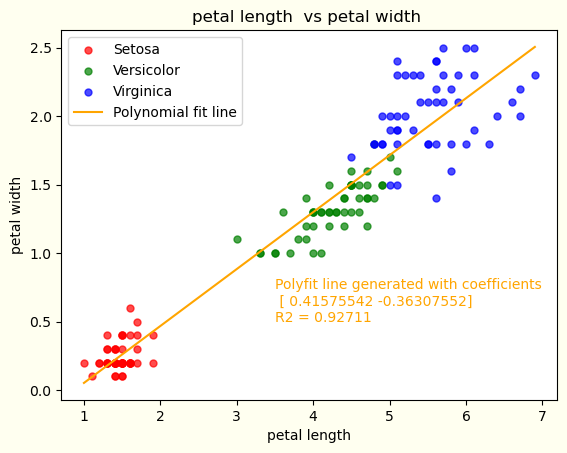

In [ ]:
def get_r2(feature_y, feature_y_poly):
    ss_r = np.sum((feature_y - feature_y_poly) ** 2 )   #Sum of Squares Regression (SSR)
    ss_t = np.sum((feature_y - np.mean(feature_y)) ** 2)    #Total Sum of Squares (SST)
    r2 = 1 - (ss_r / ss_t)
    return r2


# 'fig' is the figure, 'ax' is the axes
fig, ax = plt.subplots()  

# Define the colors for the species
colors = {'Setosa':'red', 'Versicolor':'green', 'Virginica':'blue'}  # Color for Setosa, Versicolor, and Virginica


feature_x = df_iris['petal.length'] #x value for scatter
feature_y = df_iris['petal.width']  #y value for scatter

# Fit a simple linear regression line (1st-degree polynomial)
coeffs = np.polyfit(feature_x, feature_y, deg=1)
feature_y_poly = np.polyval(coeffs, feature_x)
polynomial = np.poly1d(coeffs)

# Generate x values for plotting the polynomial fit line (only 2 data points needed for a linear polyfit)
x_fit = np.linspace(min(feature_x), max(feature_x), 2)
y_fit = polynomial(x_fit)
iris_species = ['Setosa', 'Versicolor', 'Virginica']

r2 = get_r2(feature_y, feature_y_poly)

#plot scatter plot
# Plot each species with different colors
for ispecies in iris_species:
    ax.scatter( df_iris[df_iris['variety'] == ispecies]["petal.length"],
                df_iris[df_iris['variety'] == ispecies]["petal.width"],  # Petal width (y-axis)
                color=colors[ispecies],  # Color for the species
                label=ispecies,  # Label for the species
                alpha=0.7,  # Set transparency
                marker = '.',  # dot
                s=100)  # Size of the points


# Plot the polynomial fit line
ax.plot(x_fit, y_fit, color='orange', label='Polynomial fit line')

#Axis labels, title, annotation, and background color
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_title(f'{ds_iris.feature_names[2].replace('(cm)', '')} vs {ds_iris.feature_names[3].replace('(cm)', '')}')
ax.annotate(f'Polyfit line generated with coefficients\n {coefficients}\nR2 = {r2:.5f}', xy=(3.5, 0.5), color='orange')
ax.legend()
fig.set_facecolor('ivory')
plt.show()

**The Polyline and R2 are applied thru 3 species of Iris data.**  
Lets calculate separate lines/values for the 3 species

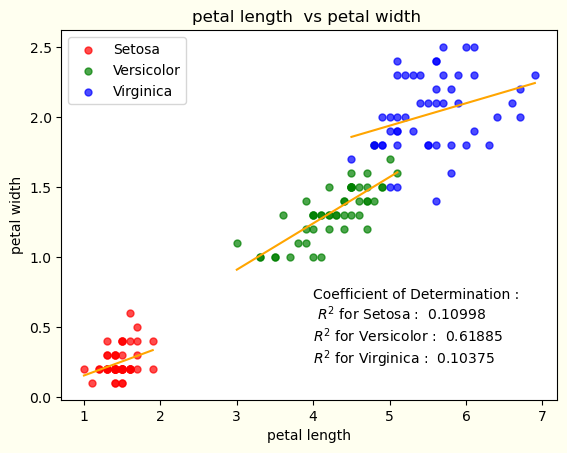

In [ ]:
def get_correlation_data(feature_x, feature_y):
    # Fit a simple linear regression line (1st-degree polynomial)
    coeffs = np.polyfit(feature_x, feature_y, deg=1)
    feature_y_poly = np.polyval(coeffs, feature_x)
    polynomial = np.poly1d(coeffs)

    # Generate x values for plotting the polynomial fit line (only 2 data points needed for a linear polyfit)
    x_fit = np.linspace(min(feature_x), max(feature_x), 2)
    y_fit = polynomial(x_fit)
    ss_r = np.sum((feature_y - feature_y_poly) ** 2 )   #Sum of Squares Regression (SSR)
    ss_t = np.sum((feature_y - np.mean(feature_y)) ** 2)    #Total Sum of Squares (SST)
    r2 = 1 - (ss_r / ss_t)
    return {'x_fit':x_fit, 'y_fit':y_fit, 'r2':r2}


# 'fig' is the figure, 'ax' is the axes
fig, ax = plt.subplots()  

# Define the colors for the species
colors = {'Setosa':'red', 'Versicolor':'green', 'Virginica':'blue'}  # Color for Setosa, Versicolor, and Virginica
iris_species = ['Setosa', 'Versicolor', 'Virginica']

#plot scatter plot
# Plot each species with different colors
r2_data = ''
for ispecies in iris_species:
    feature_x = df_iris[df_iris['variety'] == ispecies]['petal.length'] #x value for scatter
    feature_y = df_iris[df_iris['variety'] == ispecies]['petal.width']  #y value for scatter
    corr_data = get_correlation_data(feature_x, feature_y)
    r2_data = r2_data + f"$R^2$ for {ispecies} :  {corr_data['r2']:.5f}\n"
    ax.scatter( feature_x,
                feature_y,  # Petal width (y-axis)
                color=colors[ispecies],  # Color for the species
                label=ispecies,  # Label for the species
                alpha=0.7,  # Set transparency
                marker = '.',  # dot
                s=100)  # Size of the points


    # Plot the polynomial fit line
    ax.plot(corr_data['x_fit'], corr_data['y_fit'], color='orange')

#Axis labels, title, annotation, and background color
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')
ax.set_title(f'{ds_iris.feature_names[2].replace('(cm)', '')} vs {ds_iris.feature_names[3].replace('(cm)', '')}')
ax.annotate(f'Coefficient of Determination :\n {r2_data}', xy=(4.0, 0.1), color='black')
ax.legend()
fig.set_facecolor('ivory')
plt.show()

Clearly by visual inspection, you can see that the Versicolor species has a "good" fit for a best-fit regression line.  
The other 2 species ... not so good.  
The calculated $R^2$ values reflect this
* Setosa : 0.10998
* Versicolor : 0.61885
* Virginica : 0.10375

***
##### Finally lets do this plot for all combinations of Feature pairs

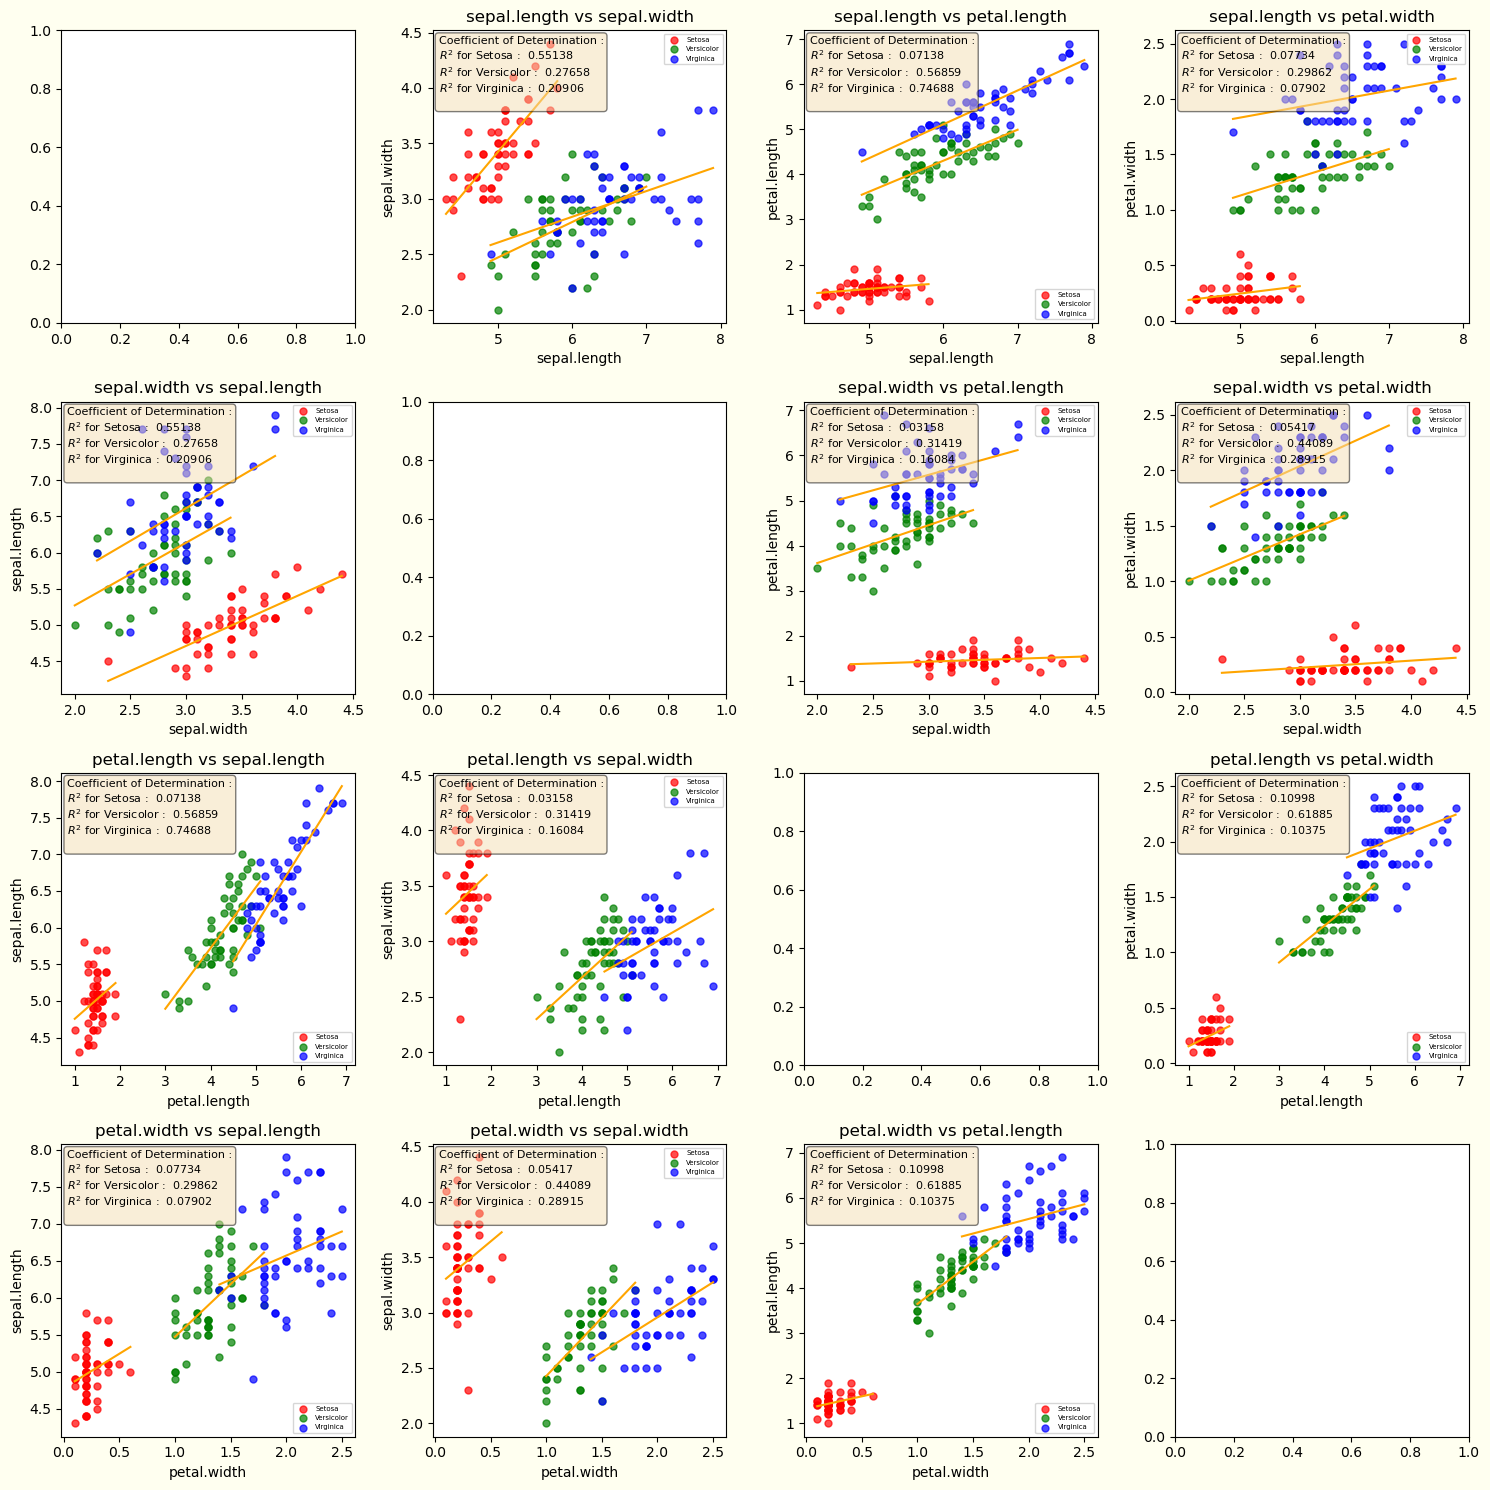

In [83]:
#plot the text block
def plot_text(txt:str, ax):
    txt_summary = txt
    ax.text(0.02, 0.98, txt_summary, transform = ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))  

def get_correlation_data(feature_x, feature_y):
    # Fit a simple linear regression line (1st-degree polynomial)
    coeffs = np.polyfit(feature_x, feature_y, deg=1)
    feature_y_poly = np.polyval(coeffs, feature_x)
    polynomial = np.poly1d(coeffs)

    # Generate x values for plotting the polynomial fit line (only 2 data points needed for a linear polyfit)
    x_fit = np.linspace(min(feature_x), max(feature_x), 2)
    y_fit = polynomial(x_fit)
    ss_r = np.sum((feature_y - feature_y_poly) ** 2 )   #Sum of Squares Regression (SSR)
    ss_t = np.sum((feature_y - np.mean(feature_y)) ** 2)    #Total Sum of Squares (SST)
    r2 = 1 - (ss_r / ss_t)
    return {'x_fit':x_fit, 'y_fit':y_fit, 'r2':r2}


# Set up a 4x4 grid for 16 Feature combinations
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), facecolor = 'ivory')

# Define the colors for the species
colors = {'Setosa':'red', 'Versicolor':'green', 'Virginica':'blue'}  # Color for Setosa, Versicolor, and Virginica
iris_species = ['Setosa', 'Versicolor', 'Virginica']
features = df_iris.columns
#plot scatter plot
# Plot each species with different colors
r2_data = ''
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        r2_data = ''
        if( i != j ):
            for ispecies in iris_species:
                feature_x = df_iris[df_iris['variety'] == ispecies][features[i]] #x value for scatter
                feature_y = df_iris[df_iris['variety'] == ispecies][features[j]]  #y value for scatter
                corr_data = get_correlation_data(feature_x, feature_y)
                r2_data = r2_data + f"$R^2$ for {ispecies} :  {corr_data['r2']:.5f}\n"
                ax.scatter( feature_x,
                            feature_y,  # Petal width (y-axis)
                            color=colors[ispecies],  # Color for the species
                            label=ispecies,  # Label for the species
                            alpha=0.7,  # Set transparency
                            marker = '.',  # dot
                            s=100)  # Size of the points


                # Plot the polynomial fit line
                ax.plot(corr_data['x_fit'], corr_data['y_fit'], color='orange')
            plot_text(f'Coefficient of Determination :\n{r2_data}', ax)
            #Axis labels, title, annotation, and background color
            ax.set_xlabel(features[i])
            ax.set_ylabel(features[j])
            ax.set_title(f'{features[i]} vs {features[j]}')
            #ax.annotate(, xy=(4.0, 0.1), color='black', fontsize= 3)
            ax.legend(fontsize = 5)
            
fig.set_facecolor('ivory')
plt.tight_layout()
plt.show()

Note: It was hard to know where to position the $R^2$ TextBox above. It is interesting that Matplotlib will automatically position the legend.

***
Earlier in the scatterplot of task 6, I was concerned that the polyline for the sotosa scatter plots of   
* petal length vs sepal length  
* petal length vs sepal width
... did not look correct ??  
  
![Image 1](resources/scatter_badline1.png)
![Image 2](resources/scatter_badline2.png)   
It would appear that the red ployfit line would appear to need to a greater "slope"  .i.e. a larger m value in $m*x + C$

As we have now calculated the $R^2$ value for these pairs, we can see how low the correlation is ...
* $R^2$ for petal length vs sepal length = 0.071
* $R^2$ for petal length vs sepal width = 0.031  

*Very low scores!*